# Amazon Rainforest Fires

#### Abstract

Using the `amazon.csv` data file provided by [Kaggle](https://www.kaggle.com/gustavomodelli/forest-fires-in-brazil), we look at the number of forest fires that occur each month and each year (from 1998-2017). We also group the number of forest fires by state and see if there are any that experience more than others.

### Procedure

First, we will import the following libraries, as well as the data we will use in this report:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('amazon.csv', thousands=".")

Now that we have imported our data and appropriate libraries, let us take a look at the first 5 entries in the dataset.

In [3]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0,1998-01-01
1,1999,Acre,Janeiro,0,1999-01-01
2,2000,Acre,Janeiro,0,2000-01-01
3,2001,Acre,Janeiro,0,2001-01-01
4,2002,Acre,Janeiro,0,2002-01-01


There are five different columns in our dataset:
 - `year`: the year the forest fire happened
 - `state`: the Brazillian state
 - `month`: the month the forest fire occurred (in Portugese)
 - `number`: the number of forest fires (in thousands)
 - `date`: the date the forest fire occurred
 
_Note: we will translate the months into English later on._

In [4]:
data.shape

(6454, 5)

There are a total of 6454 entries in this dataset.
<br>
<br>
However, that number will be reduced if there are any empty values that do not help this report.

In [5]:
data.isna().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

As we can see there are 617 instances where there are 0 forest fires reported. They will be removed from the dataset.

In [6]:
data = data.replace(0, np.nan)
final_data = data.dropna(subset=['number'])
final_data.describe(include='all')

,year,state,month,number,date
count,5837.000000,5837,5837,5837.000000,5837
unique,NaN,23,12,NaN,20
top,NaN,Rio,Outubro,NaN,2016-01-01
freq,NaN,661,534,NaN,317
mean,2007.834847,NaN,NaN,577.947918,NaN
std,5.649076,NaN,NaN,1625.176973,NaN
min,1998.000000,NaN,NaN,1.000000,NaN
25%,2003.000000,NaN,NaN,16.000000,NaN
50%,2008.000000,NaN,NaN,72.000000,NaN
75%,2013.000000,NaN,NaN,334.000000,NaN


Now we see that there are 5837 entries that we can work with.

## Amazon Rainforest Fires by Month

Let's take a look at the number of Amazon Rainforest Fires that occurred in each month.

In [7]:
forest_fires_by_month = final_data.groupby('month')['number'].sum()
months = list(final_data.month.unique())
forest_fires_by_month = forest_fires_by_month.reindex(months, axis=0)
forest_fires_by_month = forest_fires_by_month.to_frame()
forest_fires_by_month.reset_index(level=0, inplace=True)
forest_fires_by_month

,month,number
0,Janeiro,52587.0
1,Fevereiro,30952.0
2,Mar�o,35118.0
3,Abril,28364.0
4,Maio,46083.0
5,Junho,111405.0
6,Julho,217620.0
7,Agosto,740841.0
8,Setembro,1015925.0
9,Outubro,629665.0


To visualize this, we will use a simple bar graph using Pyplot and Seaborn to illustrate which months have more records of forest fires.

As mentioned earlier, the data has the months in Portugese, so now we will translate these months into English.

Text(0.5, 0, '')

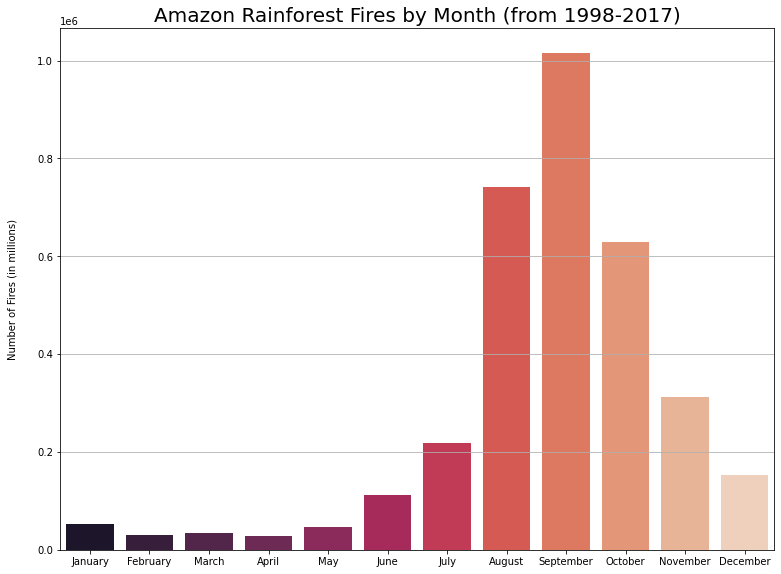

In [8]:
months_eng = ['January', 'February', 'March', 'April', 'May', 'June',
             'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=[12.8, 9.6])
plt.title('Amazon Rainforest Fires by Month (from 1998-2017)', fontsize=20)
sns.barplot(x='month', y='number', data=forest_fires_by_month, palette='rocket', ci=None)
plt.grid(axis='y')
ax = plt.subplot()
ax.set_xticklabels(months_eng)
ax.set_ylabel('Number of Fires (in millions)', labelpad=20)
ax.set_xlabel('')

From the bar graph, we see that most forest fires occur between August and November.

## Amazon Rainforest Fires by Year

Next, we will look at a yearly view on the number of forest fires in the Amazon.

In [9]:
forest_fires_by_year = final_data.groupby('year')['number'].sum()
years = sorted(final_data.year.unique())
forest_fires_by_year = forest_fires_by_year.to_frame()
forest_fires_by_year.reset_index(level=0, inplace=True)
print(forest_fires_by_year)

    year    number
0   1998  123881.0
1   1999  132526.0
2   2000   97541.0
3   2001  137926.0
4   2002  220015.0
5   2003  208476.0
6   2004  248928.0
7   2005  224294.0
8   2006  123327.0
9   2007  206412.0
10  2008  117993.0
11  2009  111763.0
12  2010  223228.0
13  2011  131271.0
14  2012  163353.0
15  2013  105572.0
16  2014  170259.0
17  2015  209296.0
18  2016  171132.0
19  2017  246289.0


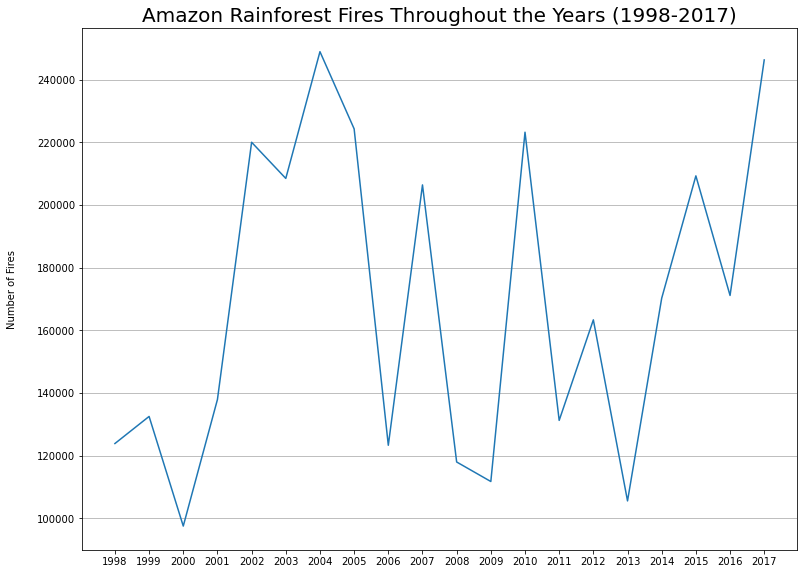

In [10]:
plt.figure(figsize=[12.8, 9.6])
plt.title('Amazon Rainforest Fires Throughout the Years (1998-2017)', fontsize=20)
sns.lineplot(x='year', y='number', data=forest_fires_by_year)
plt.xticks(years)
plt.grid(axis='y')
plt.ylabel('Number of Fires', labelpad=20)
plt.xlabel('')
plt.show()

As we can see, the the number of fires have been sporadic over the span of 20 years. However, we can see that there are calls for concern starting from 2013, as there is an upward trajectory of fires.

## Amazon Rainforest Fires by State

Lastly, we will look at how fires have affected each state on both a monthly and yearly basis.

### <font color='red'>By Month</font>

In [11]:
forest_fires_by_state_monthly = final_data.groupby(['state', 'month'])['number'].sum()
states = list(final_data.state.unique())
forest_fires_by_state_monthly = forest_fires_by_state_monthly.to_frame()
forest_fires_by_state_monthly.reset_index(level=0, inplace=True)
print(forest_fires_by_state_monthly)

               state   number
month                        
Abril           Acre     41.0
Agosto          Acre  19324.0
Dezembro        Acre     47.0
Fevereiro       Acre     19.0
Janeiro         Acre     40.0
...              ...      ...
Maio       Tocantins   5676.0
Mar�o      Tocantins    912.0
Novembro   Tocantins   5176.0
Outubro    Tocantins  35513.0
Setembro   Tocantins  81503.0

[276 rows x 2 columns]


Now we will see if there are any significant states that see a high number of forest fires on a monthly basis.

Text(0.5, 0, '')

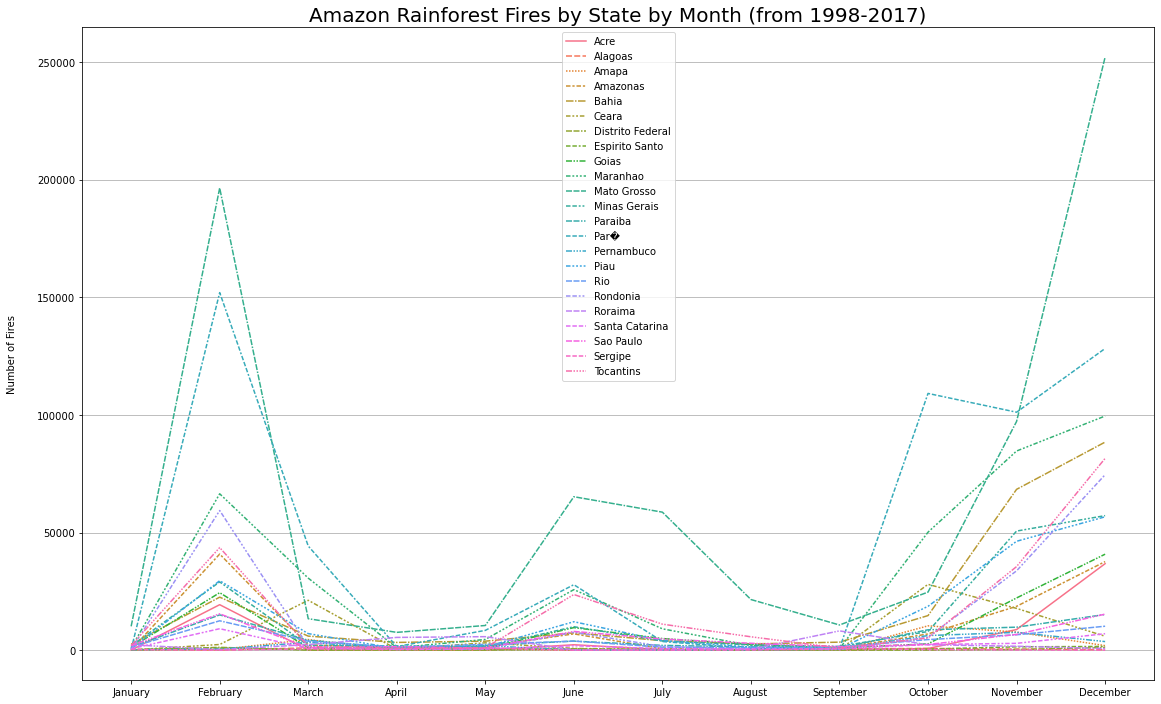

In [12]:
plt.figure(figsize=[19.2, 12])
plt.title('Amazon Rainforest Fires by State by Month (from 1998-2017)', fontsize=20)
sns.lineplot(x='month', y='number', hue='state', data=forest_fires_by_state_monthly, style='state')
plt.grid(axis='y')
plt.legend(loc=9)
ax = plt.subplot()
ax.set_xticklabels(months_eng)
ax.set_ylabel('Number of Fires', labelpad=20)
ax.set_xlabel('')

We can see that Mato Grosso and Par(?) have a significantly higher amount of forest fires in the month of February. Overall, Mato Grosso looks to have the most forest fires throuughout the year compared to other states.

### <font color='red'>By Year</font>

In [13]:
forest_fires_by_state_yearly = final_data.groupby(['state', 'year'])['number'].sum()
forest_fires_by_state_yearly = forest_fires_by_state_yearly.to_frame()
forest_fires_by_state_yearly.reset_index(level=0, inplace=True)
print(forest_fires_by_state_yearly)

          state   number
year                    
1998       Acre    730.0
1999       Acre    333.0
2000       Acre    434.0
2001       Acre    828.0
2002       Acre   3491.0
...         ...      ...
2013  Tocantins   8127.0
2014  Tocantins   7748.0
2015  Tocantins   9123.0
2016  Tocantins  14854.0
2017  Tocantins  21129.0

[460 rows x 2 columns]


Text(0.5, 0, '')

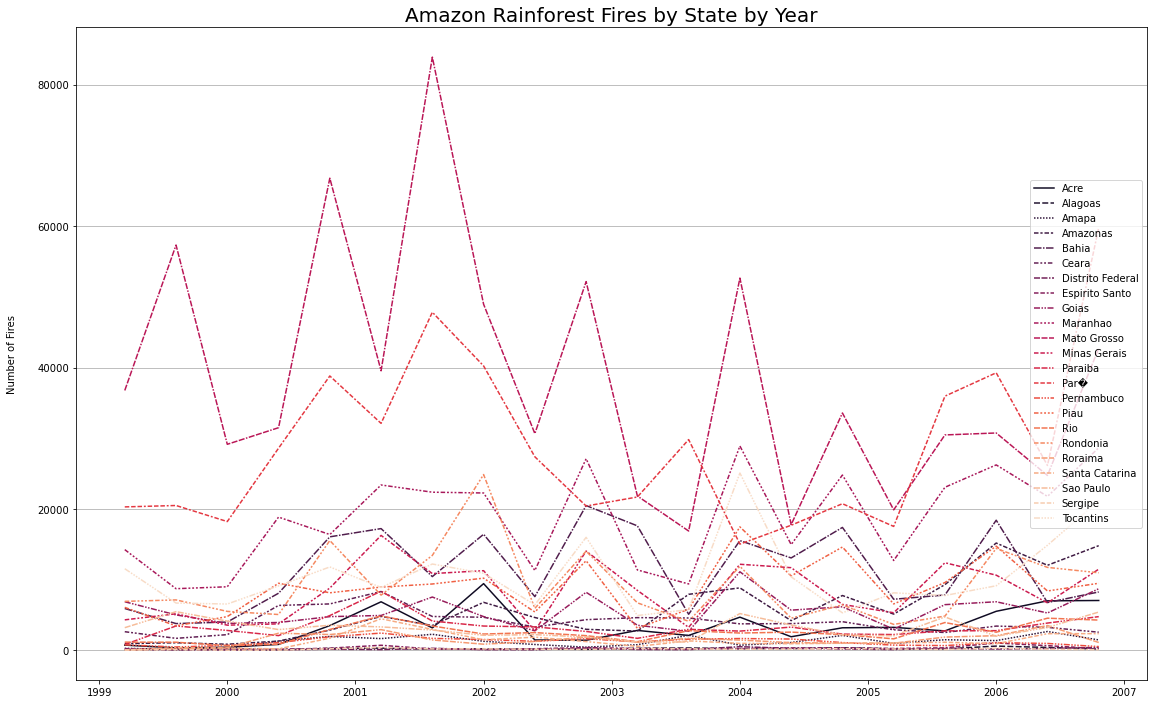

In [14]:
plt.figure(figsize=[19.2, 12])
plt.title('Amazon Rainforest Fires by State by Year', fontsize=20)
sns.lineplot(x='year', y='number', hue='state', data=forest_fires_by_state_yearly, palette='rocket', style='state')
plt.grid(axis='y')
plt.legend(loc=7)
ax = plt.subplot()
ax.set_xticklabels(years)
ax.set_ylabel('Number of Fires', labelpad=20)
ax.set_xlabel('')

Similar to the previous graph, Mato Grosso an Par(?) have experienced the most forest fires on a yearly basis.